In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
path = Path(os.getcwd())
sys.path.append(str(path.parent.absolute()))
from collections import defaultdict
from commons import *

In [7]:
! ls ../data/archive

PP_recipes.csv              ingr_map.pkl
PP_users.csv                interactions_test.csv
RAW_interactions.csv        interactions_train.csv
RAW_recipes.csv             interactions_validation.csv


In [8]:
preprocessed_recipes = pd.read_csv('../data/archive/PP_recipes.csv')
preprocessed_recipes.head(5)

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [10]:
raw_recipes = pd.read_csv('../data/archive/RAW_recipes.csv')
raw_recipes.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [11]:
raw_users = pd.read_csv('../data/archive/RAW_interactions.csv')
raw_users.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [18]:
ratingsPerRecipe = defaultdict(list)
for index, row in raw_users.iterrows():
    ratingsPerRecipe[row['recipe_id']].append(row['rating'])

In [19]:
avgRatingsPerRecipe = {}
for recipe_id, ratings in ratingsPerRecipe.items():
    avgRatingsPerRecipe[recipe_id] = np.mean(ratings)

In [20]:
# get time taken to cook
timeTakenPerRecipe = {}
for index, row in raw_recipes.iterrows():
    timeTakenPerRecipe[row['id']] = row['minutes']

In [21]:
# get number of ingredients
numIngredientsPerRecipe = {}
for index, row in raw_recipes.iterrows():
    numIngredientsPerRecipe[row['id']] = len(row['ingredients'].split(','))


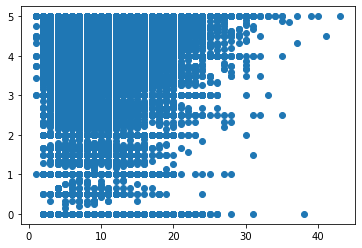

In [23]:
#plot number of ingredients vs avg rating
plt.scatter(list(numIngredientsPerRecipe.values()), list(avgRatingsPerRecipe.values()))

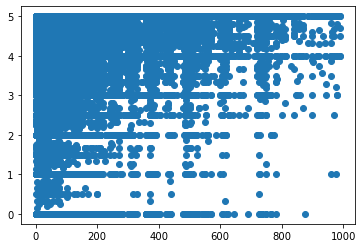

In [30]:
# plot time taken to cook vs avg rating
# plot only recipes that take less than 1000 minutes to cook
timeTakenPerRecipe = {k: v for k, v in timeTakenPerRecipe.items() if v < 1000}
# get avg ratings for recipes that take less than 1000 minutes to cook
avgRatingsPerRecipe = {k: v for k, v in avgRatingsPerRecipe.items() if k in timeTakenPerRecipe.keys()}
plt.scatter(list(timeTakenPerRecipe.values()), list(avgRatingsPerRecipe.values()))

(array([  4976.,    161.,   1495.,    682.,   3206.,   4422.,  12005.,
          9526.,  50125., 142798.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

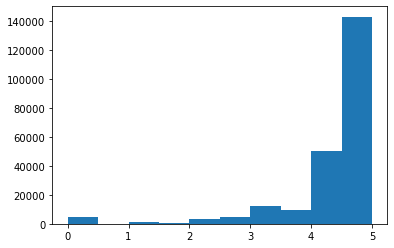

In [31]:
# plot histogram of avg ratings
plt.hist(list(avgRatingsPerRecipe.values()))

(array([3.9509e+04, 9.6106e+04, 6.8593e+04, 2.1584e+04, 4.6860e+03,
        9.8200e+02, 1.3700e+02, 2.7000e+01, 9.0000e+00, 4.0000e+00]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]),
 <BarContainer object of 10 artists>)

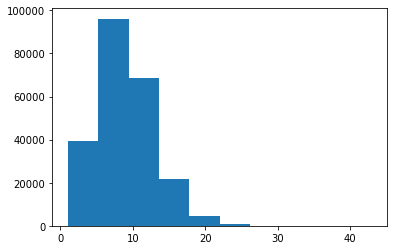

In [32]:
# plot histogram of number of ingredients
plt.hist(list(numIngredientsPerRecipe.values()))

(array([1.99546e+05, 1.67030e+04, 5.20900e+03, 3.18700e+03, 1.78100e+03,
        1.71800e+03, 5.76000e+02, 4.90000e+02, 9.60000e+01, 9.00000e+01]),
 array([  0.,  99., 198., 297., 396., 495., 594., 693., 792., 891., 990.]),
 <BarContainer object of 10 artists>)

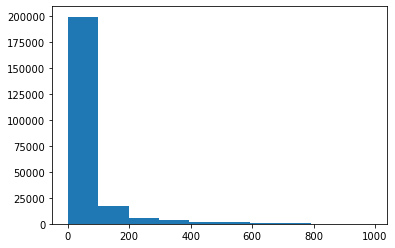

In [33]:
# plot histogram of time taken to cook
plt.hist(list(timeTakenPerRecipe.values()))
